In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Metadata of Diamonds Dataset:</h2><br/>
<b>carat</b> - Carat weight of the diamond<br/>
<b>cut</b> - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal<br/>
<b>color</b> - Color of the diamond, with D being the best and J the worst<br/>
<b>clarity</b> - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3<br/>
<b>depth</b> - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter<br/>
<b>table</b> - table%: The width of the diamond's table expressed as a percentage of its average diameter<br/>
<b>price</b> - the price of the diamond<br/>
<b>length</b> - in mm<br/>
<b>width</b> - in mm<br/>
<b>depth</b> - in mm<br/><br/>

<h4>Model(s) to predict diamond price</h4><br/>


In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth_percnt,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(df['color'].value_counts())
print(df['clarity'].value_counts())
print(df['cut'].value_counts())

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [4]:
#color_ord_map = {'D': 7, 'E': 6, 'F': 5, 
#               'G': 4, 'H': 3, 'I': 2, 'J': 1}
#df['ColorLabel'] = df['color'].map(color_ord_map)

#FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#clarity_ord_map = {'FL': 11, 'IF': 10, 'VVS1': 9, 
#               'VVS2': 8, 'VS1': 7, 'VS2': 6, 'SI1': 5, 'SI2': 4, 'I1': 3, 'I2': 2, 'I3': 1}
#df['ClarityLabel'] = df['clarity'].map(clarity_ord_map)

#ClarityFeatures = pd.get_dummies(df['clarity'])
#ColorFeatures = pd.get_dummies(df['color'])

df1 = df
df1 = pd.concat([df1.drop('clarity', axis=1), pd.get_dummies(df1['clarity'])], axis=1)
df1 = pd.concat([df1.drop('color', axis=1), pd.get_dummies(df1['color'])], axis=1)

#Fair, Good, Very Good, Premium, Ideal
cut_ord_map = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
df1['CutLabel'] = df1['cut'].map(cut_ord_map)

df1.head(5)

,carat,cut,depth_percnt,table,price,length,width,depth,I1,IF,...,VVS1,VVS2,D,E,F,G,H,I,J,CutLabel
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,1,0,0,0,0,0,5
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,1,0,0,0,0,0,4
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,0,...,0,0,0,1,0,0,0,0,0,2
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,0,0,0,0,0,0,1,0,4
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,0,0,0,0,0,0,1,2


In [5]:
df1.isnull().sum()

carat           0
cut             0
depth_percnt    0
table           0
price           0
length          0
width           0
depth           0
I1              0
IF              0
SI1             0
SI2             0
VS1             0
VS2             0
VVS1            0
VVS2            0
D               0
E               0
F               0
G               0
H               0
I               0
J               0
CutLabel        0
dtype: int64

In [6]:
df1.describe()

,carat,depth_percnt,table,price,length,width,depth,I1,IF,SI1,...,VVS1,VVS2,D,E,F,G,H,I,J,CutLabel
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.013737,0.033185,0.242214,...,0.067760,0.093919,0.125603,0.181628,0.176900,0.209344,0.153949,0.100519,0.052058,3.904097
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.116400,0.179121,0.428427,...,0.251337,0.291719,0.331404,0.385541,0.381588,0.406844,0.360903,0.300694,0.222146,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


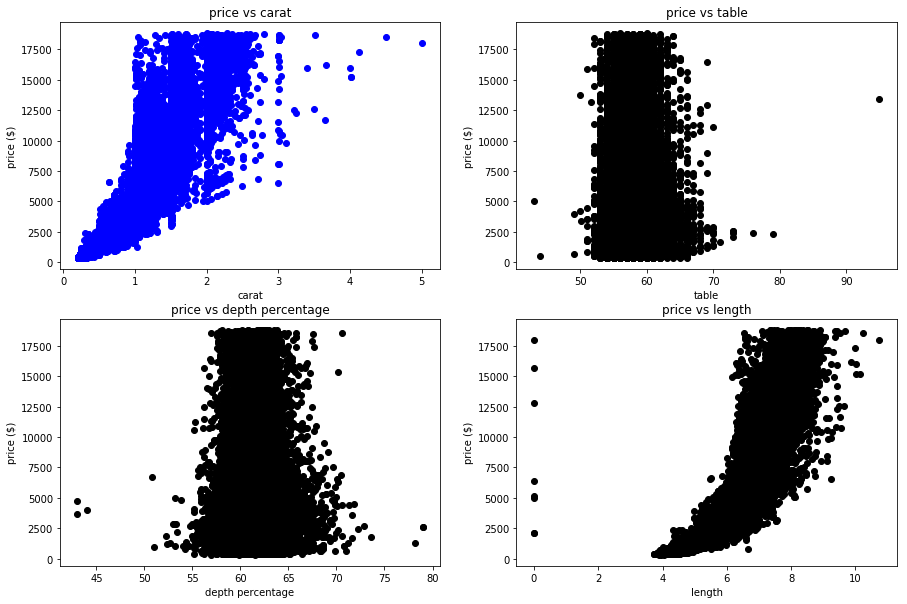

In [7]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
plt.scatter(
    df1['carat'],
    df1['price'],
    c='blue'
)
plt.xlabel("carat")
plt.ylabel("price ($)")
plt.title("price vs carat")

plt.subplot(2,2,2)
plt.scatter(
    df1['table'],
    df1['price'],
    c='black'
)
plt.xlabel("table")
plt.ylabel("price ($)")
plt.title("price vs table")

plt.subplot(2,2,3)
plt.scatter(
    df1['depth_percnt'],
    df1['price'],
    c='black'
)
plt.xlabel("depth percentage")
plt.ylabel("price ($)")
plt.title("price vs depth percentage")

plt.subplot(2,2,4)
plt.scatter(
    df1['length'],
    df1['price'],
    c='black'
)
plt.xlabel("length")
plt.ylabel("price ($)")
plt.title("price vs length")
plt.show()

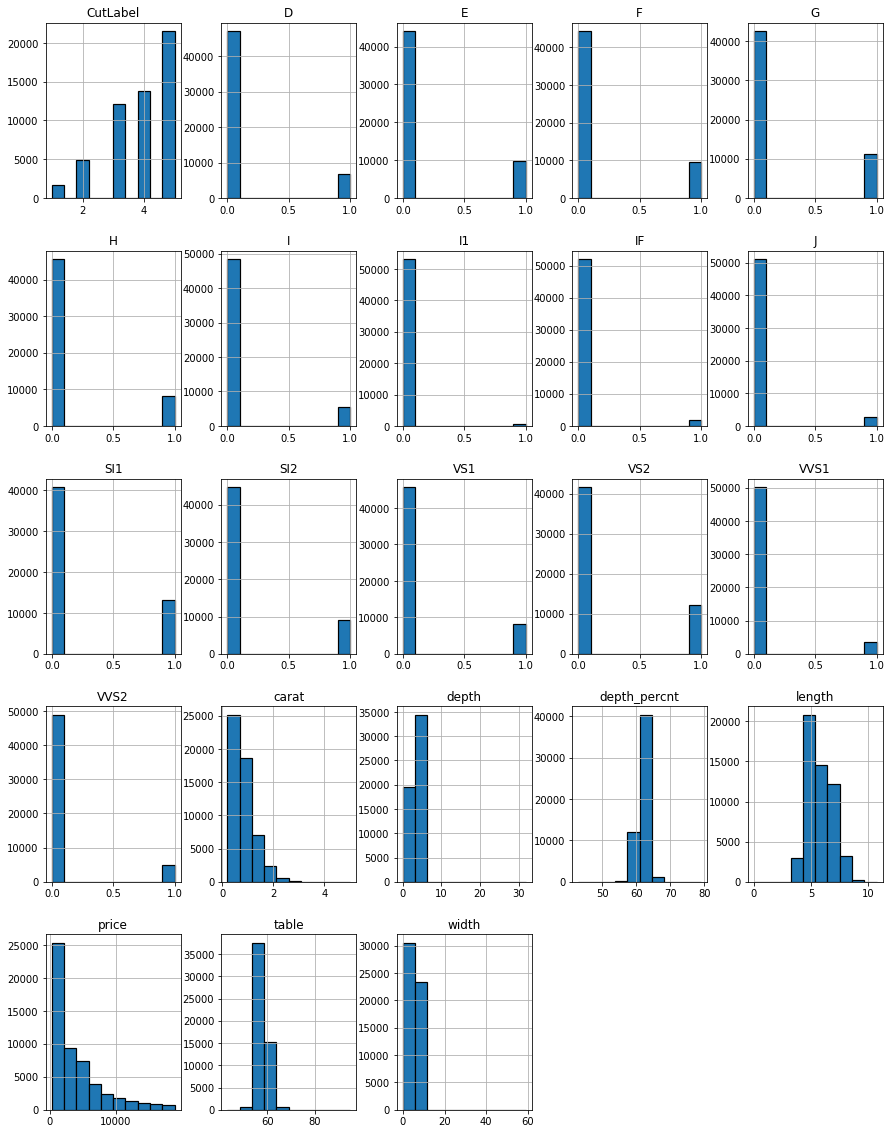

In [8]:
df1.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,20)
plt.show()

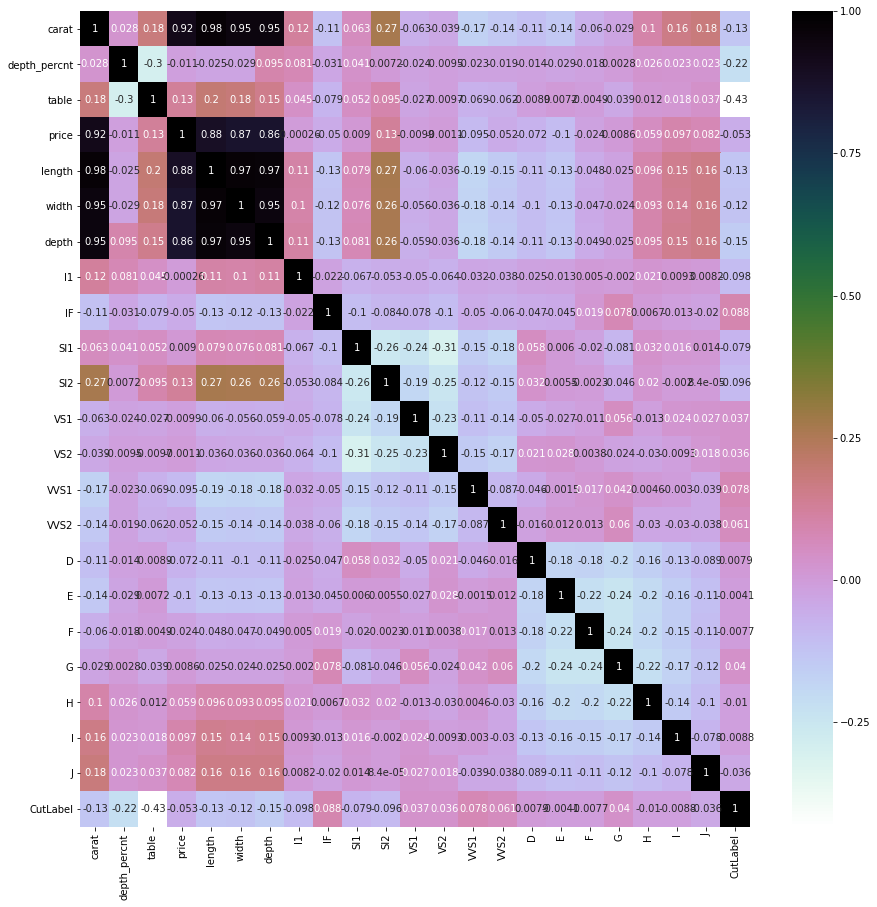

In [9]:
import seaborn as sns
plt.figure(figsize=(15,15)) 
sns.heatmap(df1.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [10]:
#KNN regression with 70% training data and 30% test data
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
#,df.ColorLabel,df.ClarityLabel,df.CutLabel,df.carat,df.length,df.width,df.depth
#df_new = df1.head(100).reset_index()
df_new = df1.drop(['price', 'length', 'width', 'depth', 'cut'], axis=1)
X = df_new
Y = df1.price
knn.fit(X, Y)
Output = knn.predict(X)
print(Output)
print('R-squared KNN:', knn.score(X, Y))

[ 326.  326.  327. ... 2757. 2757. 2757.]
R-squared KNN: 0.9995036816024031


In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, Y)
OutputReg = reg.predict(X)
print(OutputReg)
print('R-squared REG:', reg.score(X, Y))

[-1850.375 -1266.5    -347.125 ...  3110.375  2815.75   2955.625]
R-squared REG: 0.9155345033837302


In [12]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.438e+04
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:55:33   Log-Likelihood:            -4.5712e+05
No. Observations:               53940   AIC:                         9.143e+05
Df Residuals:                   53922   BIC:                         9.144e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -244.2219    285.676     -0.855   

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
#holdOut groups for both the models
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print('With 30% Holdout for Linear Regression: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on the entire dataset for Linear Regression: ' + str(reg.fit(X, Y).score(X, Y)))

print('With 30% Holdout for KNN Regression: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on the entire dataset for KNN Regression: ' + str(knn.fit(X, Y).score(X, Y)))

With 30% Holdout for Linear Regression: 0.9159481619123384
Testing on the entire dataset for Linear Regression: 0.9155345033837302
With 30% Holdout for KNN Regression: 0.7525833688642574
Testing on the entire dataset for KNN Regression: 0.9995036816024031


In [18]:
#Cross Validation for both the models
from sklearn.model_selection import cross_val_score
print("Cross validation for Linear regression: ",cross_val_score(reg, X, Y, cv=10))
print("Cross validation for KNN regression: ",cross_val_score(knn, X, Y, cv=10))

Cross validation for Linear regression:  [ -0.24912741   0.3217639    0.52492544   0.74833609   0.55970205
   0.91236248 -28.30213427 -11.13153379  -2.73061517  -1.11426834]
Cross validation for KNN regression:  [ -2.60808858  -1.28449114  -0.81090969  -0.94313149  -0.87019867
   0.80594729 -45.2585161  -23.11960663  -8.11726586  -6.50675047]


In [20]:
#Stats using Dimensionality Reduction
from sklearn.cross_decomposition import PLSRegression
pls1 = PLSRegression(n_components=3)
pls1.fit(X, Y)
pls1.predict(X)
print('R-squared PLSR for Linear Regression (Partial least squares regression):', pls1.score(X, Y))


R-squared PLSR for Linear Regression (Partial least squares regression): 0.9148749456221192


In [25]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=4)
X_PCA = sklearn_pca.fit_transform(X)

knn.fit(X_PCA,Y)
knn.predict(X_PCA)
print('R-squared KNN using PCAs:', knn.score(X_PCA,Y))

R-squared KNN using PCAs: 0.9994812623696936
